# Navigation Project

### 1. Imports

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
import torch
from collections import deque
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

Defining an environment and assosiated brain

In [3]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana_Windows_x86_64/Banana.exe")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Overview of environment. 

The simulation contains a single agent that navigates a large environment. There are `4` possible actions available to agent with following description:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space consist of `37` dimensions. There is `+1` reward of collecting a yellow banana and `-1` for a blue banana. By defualt, the agent interacts with an enviorment on maximum of 300 times. 

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

#number of agents in the environment
print('Number of agents:', len(env_info.agents))
# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:')
print(state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like:
[1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Agent's random interaction with environment

Execute the following code to see the agent's random interaction with environemnt

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

In [ ]:
env.close() #DO NOT EXECUTE THIS LIKE IF YOU PLAN TO PROCEED WITH FOLLOWING CELLS. 

### 4. Training the agent with DQN

In the following cell, the agent is trained with DQN to find optimal action-value pairs. The related classes are dqn_agent.py, deuling_agent.py and model.py provides implementation of DQN, DoubleDQL and DuelingDQN algorithms.  Follow the instructions below to train the agent with implemented DQN and its improvements. 

- For *vanilla DQN*, `from dqn_agent import Agent`- and set the `double_dqn=False`
- For *Double DQN*, `from dqn_agent import Agent`- and set the `double_dqn=True`
- For *Dueling DQN*, `from deuling_agent import Agent`- and set the `double_dqn=False`
- For *Double Dueling DQN*, `from deuling_agent import Agent`- and set the `double_dqn=True`

**NOTE**: The vanilla DQN implementation code is used from Udacity DRL degree. The code is modified for Navigation project

Episode 100	Average Score: 0.96
Episode 200	Average Score: 5.06e reward 5.07
Episode 300	Average Score: 8.42e reward 8.37
Episode 400	Average Score: 10.96 reward 10.99
Episode 500	Average Score: 12.79 reward 12.85
Episode 510/1000 || Best average reward 13.06
Environment solved in 510 episodes.

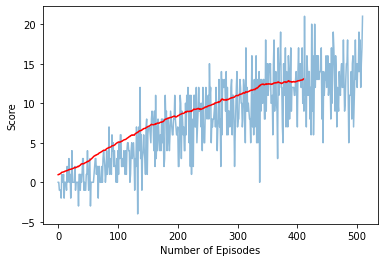

In [5]:
from dqn_agent import Agent
#from deuling_agent import Agent

    
agent = Agent(state_size=state_size, action_size=action_size, seed=0, double_dqn = False)

def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Most of the code is modified from solution excerise """
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    # initialize average rewards
    avg_rewards = deque(maxlen=n_episodes)
    # initialize best average reward
    best_avg_reward = 0
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
       
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state

        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            action = action.astype(int)
            
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if i_episode >= 100:
            avg_reward = np.mean(scores_window)
             # append to deque
            avg_rewards.append(avg_reward)
            if avg_reward > best_avg_reward:
                best_avg_reward = avg_reward
             # monitor progress
            print("\rEpisode {}/{} || Best average reward {}".format(i_episode, n_episodes, best_avg_reward), end="")
        if best_avg_reward > 13:
            print('\nEnvironment solved in {} episodes.'.format(i_episode), end="")
            #save the model
            #torch.save(agent.qnetwork_local.state_dict(), './models/dqn.pth')
            break
    return scores, avg_rewards

scores, avg_rwd = dqn()

#to store the scores and avg_rewards per 100 episodes
pd.DataFrame(zip(scores, avg_rwd), columns = ['scores', 'avg_rwds']).to_csv('models/dqn_deuling.csv')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, alpha = 0.5)
plt.plot(np.arange(len(avg_rwd)), avg_rwd, color = 'red')
plt.ylabel('Score')
plt.xlabel('Number of Episodes')
plt.show()

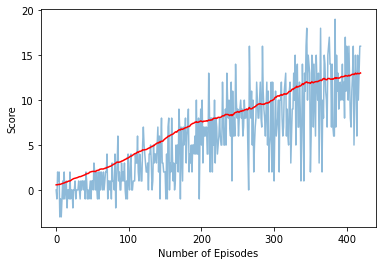

In [6]:
df = pd.read_csv('models/dqn.csv')
plt.plot(np.arange(len(df['scores'])), df['scores'], alpha = 0.5)
plt.plot(np.arange(len(df['avg_rwds'])), df['avg_rwds'], color = 'red' )
plt.ylabel('Score')
plt.xlabel('Number of Episodes')
#plt.savefig('D:/DRL/Navigation/dqn.jpg', bbox_inches='tight',pad_inches = 0, dpi = 200)
plt.show()

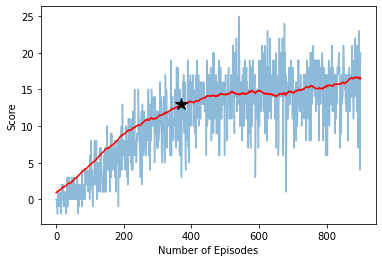

In [7]:
df = pd.read_csv('models/dqn_double_1000.csv')
plt.plot(np.arange(len(df['scores'])), df['scores'], alpha = 0.5)
plt.plot(np.arange(len(df['avg_rwds'])), df['avg_rwds'], color = 'red' )
plt.plot(370,13.02, '*', markersize = 12, color = 'black')
#plt.plot(np.arange(len(moving_averages)), moving_averages, color = 'red')
plt.ylabel('Score')
plt.xlabel('Number of Episodes')
#plt.savefig('D:/DRL/Navigation/dqn.jpg', bbox_inches='tight',pad_inches = 0, dpi = 200)
plt.show()

### 4. Testing trained agent 

In [62]:
agent.qnetwork_local.load_state_dict(torch.load('./models/dqn_double_1000.pth'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0 # initialize the score
while True:
    action = agent.act(state)
    action = action.astype(int)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode fi nished
        break
    
print("Score: {}".format(score))

Score: 19.0


In [ ]:
env.close()